<h1><center>House Sales Analysis</center></h1>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

![sales](http://www.twitrcovers.com/wp-content/uploads/2014/06/Houses-miniature-l.jpg)

[source](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [1]:
# import first
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# change the style from the very beging
plt.style.use('ggplot')
%matplotlib inline

In [2]:
#houses = pd.read_csv('F:\\Python_Projects\\Jupyter Notebook Projects\\Panads_matplotlib_bokeh\\datasets\\kc_house_data.csv')
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
houses.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Let's see the correlation via a heat map !

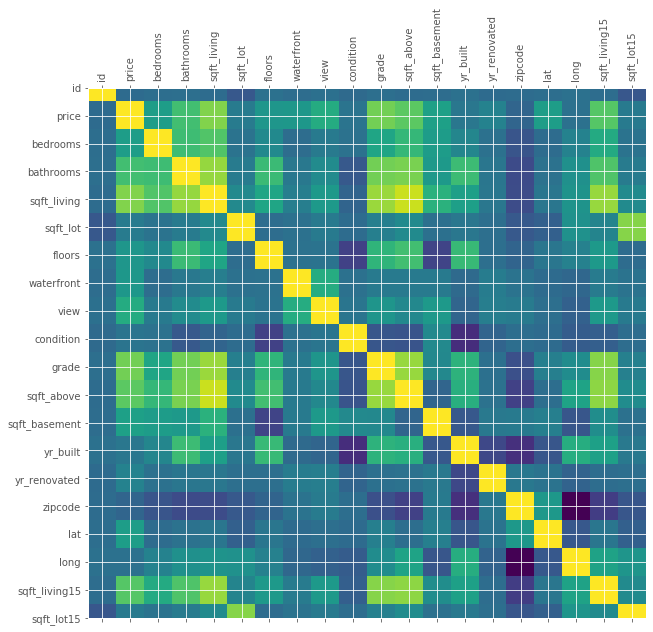

In [5]:
corr = houses.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.grid(True)
plt.show()

## Implementing Regression On Houses Data:

In [6]:
# convert date to int but taking 8 silices of the object
#after converting them we comment the line below
houses['date'] = houses['date'].str.slice(0, 8).astype(int)

In [7]:
houses_ = houses.copy()
houses_= houses[[
'id',
'date',
'price',
'bedrooms',
'bathrooms',
'sqft_living',
'sqft_lot',
'floors',
'waterfront',
'view',
'grade',
'sqft_above',
'sqft_basement',
'yr_built',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15'
]]
x = houses.iloc[:,:-1].values#:, means take every row /  :-1 means except last column
y = houses.iloc[:,:].values#:,4 means y will equal row number 4

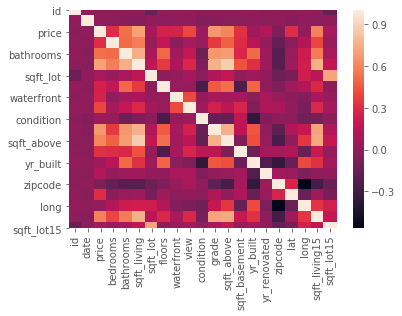

In [8]:
sns.heatmap(houses.corr())

In [9]:
feature_names = ['sqft_living']
x = houses[feature_names]
y = houses['price'].values
#spliting data into trian and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)#0.2 means 20% of the row is gone be tested
#means if we havwe 1000 rows a 200 row will be a side for later test.
#random zero means randomize whice one it picks to put a side.

In [10]:
x_train

,sqft_living
5268,1570
16909,1780
16123,1090
12181,2210
12617,1800
...,...
13123,3960
19648,1400
9845,2360
10799,2370


In [11]:
#fitting mulitiple linear re3grission model to TRAINNING set:
from sklearn.linear_model import LinearRegression
#create opbject of linear regression model
model_fit = LinearRegression()
model_fit.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# predicting the test set result
y_pred = model_fit.predict(x_test)
y_pred

array([ 357817.97314081, 1277876.09832343,  360657.65871236, ...,
        337940.17413995,  221513.06570635,  417451.37014339])

In [13]:
#calculate coeffieant
print(model_fit.coef_)

[283.96855716]


In [14]:
#calculate the interpet
print(model_fit.intercept_)

-48257.063591026585


In [15]:
#evaluating R sequare value
from sklearn.metrics import r2_score
r2_score(y_test,pred)#r2_score is getting the diffrence between y_test(the acual result) and y_predict

NameError: name 'pred' is not defined

# Insight:
## R Square Value of
## 0.47915772372653764 .

# Our first simple model of Linear Regression of Price prediction

In [16]:
compare = pd.DataFrame({'Prediction': y_pred, 'Test Data' : y_test})
compare.head(10)

,Prediction,Test Data
0,3.578180e+05,297000.0
1,1.277876e+06,1578000.0
2,3.606577e+05,562100.0
3,2.726274e+05,631500.0
4,8.547629e+05,780000.0
5,4.202911e+05,485000.0
6,4.401689e+05,340000.0
7,6.724551e+05,335606.0
8,6.503056e+05,425000.0
9,1.218243e+06,490000.0


In [17]:
#Predicting the prices
pred = model_fit.predict(xtest)

#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, model_fit.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, model_fit.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

NameError: name 'xtest' is not defined

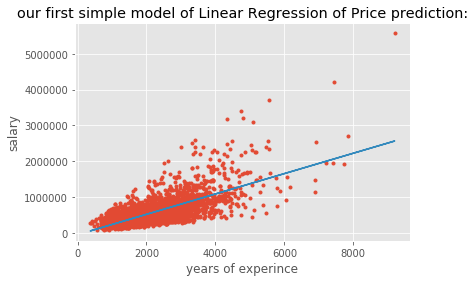

In [18]:
plt.plot(x_test, y_test,'.', x_test, y_pred, '-')
plt.title('our first simple model of Linear Regression of Price prediction:')
plt.xlabel('years of experince')
plt.ylabel('salary')
plt.show()